In [1]:
import pandas as pd

# CSV 파일 로드
file_path = "statiz_game_schedule_10_years.csv"
data = pd.read_csv(file_path)

# 승점합 계산 및 홀짝 레이블 추가
data['Total_Score'] = data['Score1'].astype(int) + data['Score2'].astype(int)
data['Odd_Even'] = data['Total_Score'].apply(lambda x: 'O' if x % 2 != 0 else 'E')

# 결과 확인
data.head()

# 새로운 CSV로 저장
output_path = "statiz_game_schedule_10_years_with_labels.csv"
data.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"새로운 데이터가 {output_path}에 저장되었습니다.")


새로운 데이터가 statiz_game_schedule_10_years_with_labels.csv에 저장되었습니다.


In [29]:
# 2024년의 데이터에서 모든 경기가 짝수였던 날짜를 다시 필터링
even_days = []

# 날짜별로 처리
for date, group in grouped_2024:
    if len(group) > 0 and all(group['Odd_Even'] == 'E'):  # 모든 경기가 짝수인 날
        even_days.append({'Date': date, 'Games': len(group)})

# 결과를 데이터프레임으로 변환
even_days_df = pd.DataFrame(even_days)

# 결과 출력
even_days_df, len(even_days_df)  # 테이블과 총 날짜 수 확인


(         Date  Games
 0  2024-06-29      1
 1  2024-08-10      4
 2  2024-08-30      2
 3  2024-09-03      4
 4  2024-09-07      5
 5  2024-09-12      3
 6  2024-09-13      1
 7  2024-10-01      1
 8  2024-10-02      1
 9  2024-10-13      1
 10 2024-10-25      1,
 11)

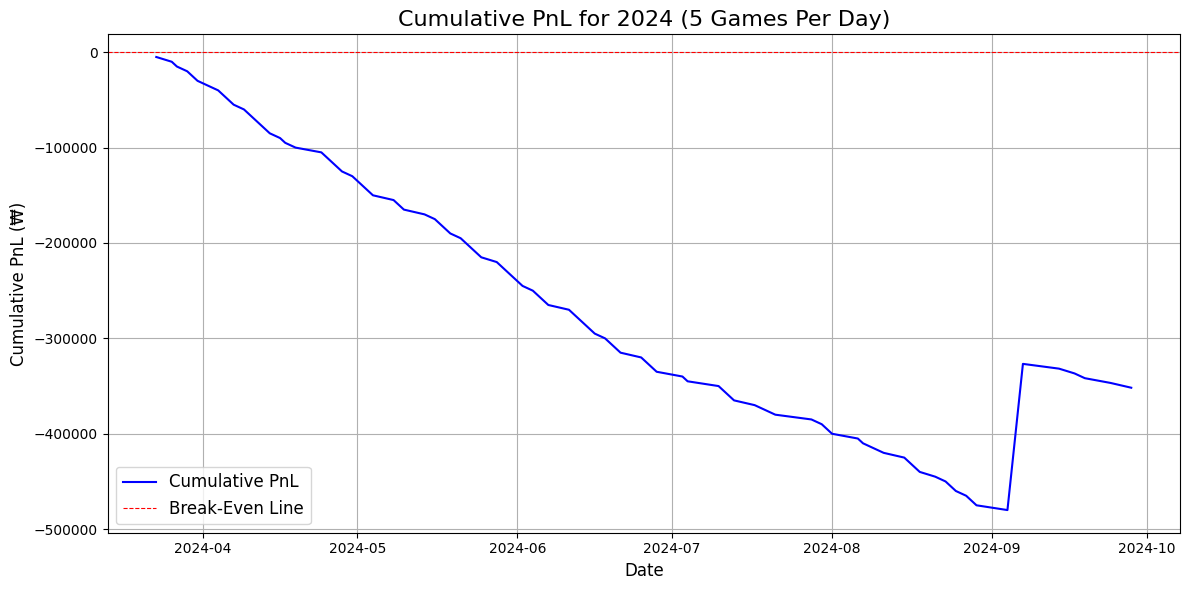

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("statiz_game_schedule_10_years_with_labels.csv")

# 2024년 데이터 필터링
data['Date'] = pd.to_datetime(data['Date'])
data_2024 = data[data['Date'].dt.year == 2024]

# 날짜별로 그룹화
grouped_2024 = data_2024.groupby('Date')

# 결과 저장용 리스트
results = []

# 5경기가 있었던 날에 대해 베팅 계산
for date, group in grouped_2024:
    if len(group) == 5:  # 해당 날짜의 경기 수가 5인 경우
        daily_bet_amount = 5000  # 날짜별로 5000원 베팅

        # 모든 승점 합이 짝수('E')인지 확인
        if all(group['Odd_Even'] == 'E'):
            # 랜덤 배당률 생성 (1.76 ~ 2.2 사이)
            odds = np.random.uniform(1.76, 2.2, len(group))
            # 베팅 금액 계산: 5000 * (각 배당률의 곱)
            total_payout = daily_bet_amount * np.prod(odds)
        else:
            # 하나라도 홀수('O')라면 베팅 금액만큼 손실
            total_payout = -daily_bet_amount

        # 결과 저장
        results.append({'Date': date, 'Total_Payout': total_payout})

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 누적 PnL 계산
results_df['Cumulative_PnL'] = results_df['Total_Payout'].cumsum()

# 결과를 CSV로 저장
results_df.to_csv("filtered_betting_results_2024.csv", index=False, encoding="utf-8-sig")

# 누적 PnL 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['Cumulative_PnL'], label='Cumulative PnL', color='blue', linestyle='-', linewidth=1.5)

# 그래프 꾸미기
plt.title("Cumulative PnL for 2024 (5 Games Per Day)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative PnL (₩)", fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label="Break-Even Line")
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


In [31]:
# 전체 데이터에서 경기 수가 5인 날 필터링 및 베팅 계산
grouped = data.groupby('Date')  # 전체 데이터를 날짜별로 그룹화

# 경기 수가 5인 날만 처리
five_game_days = []
for date, group in grouped:
    if len(group) == 5:  # 경기 수가 5인 날만
        daily_bet_amount = 5000  # 하루에 5000원 베팅

        # 모든 경기가 짝수('E')인지 확인
        if all(group['Odd_Even'] == 'E'):
            # 랜덤 배당률 생성 (1.76 ~ 2.2 사이)
            odds = np.random.uniform(1.76, 2.2, len(group))
            # 베팅 금액 계산: 5000 * (각 배당률의 곱)
            total_payout = daily_bet_amount * np.prod(odds)
        else:
            # 하나라도 홀수('O')라면 베팅 금액만큼 손실
            total_payout = -daily_bet_amount

        # 결과 저장
        five_game_days.append({'Date': date, 'Total_Payout': total_payout})

# 결과를 데이터프레임으로 변환
five_game_days_df = pd.DataFrame(five_game_days)

# 누적 PnL 계산
five_game_days_df['Cumulative_PnL'] = five_game_days_df['Total_Payout'].cumsum()

# 전체 수익 계산
total_bet_amount = len(five_game_days_df) * 5000  # 총 베팅 금액
total_payout = five_game_days_df['Total_Payout'].sum()
profit = total_payout - total_bet_amount

total_bet_amount, total_payout, profit


(5595000, -2938834.84791651, -8533834.84791651)

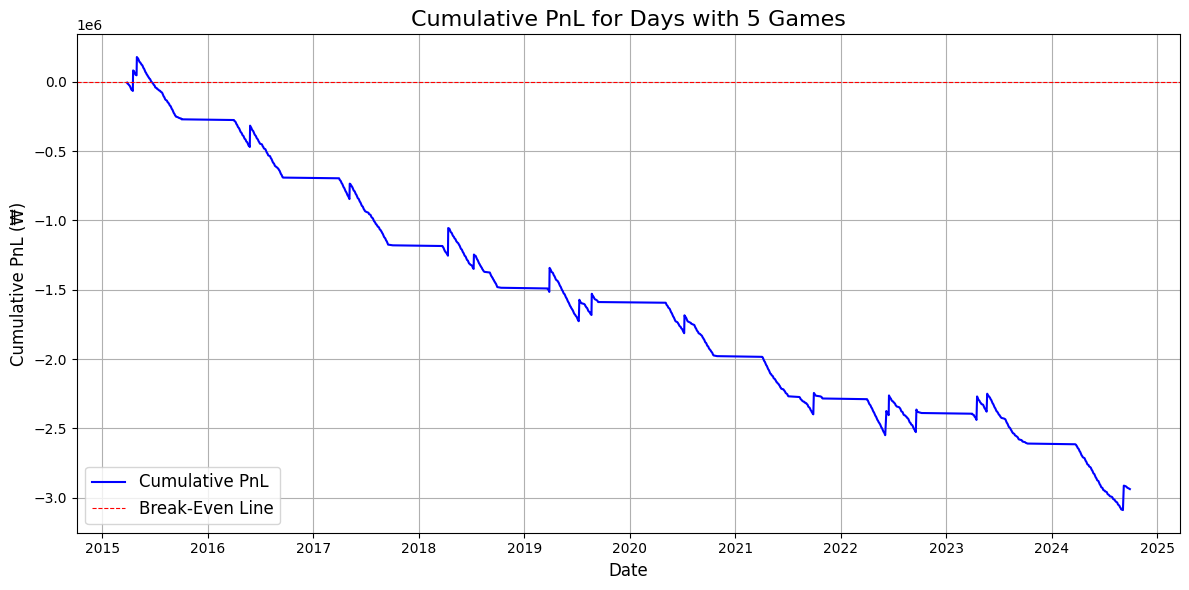

In [32]:
# PnL 그래프 생성

import matplotlib.pyplot as plt

# 날짜 형식 변환 및 정렬
five_game_days_df['Date'] = pd.to_datetime(five_game_days_df['Date'])
five_game_days_df = five_game_days_df.sort_values('Date')

# 누적 PnL 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(five_game_days_df['Date'], five_game_days_df['Cumulative_PnL'], label='Cumulative PnL', color='blue', linestyle='-', linewidth=1.5)

# 그래프 꾸미기
plt.title("Cumulative PnL for Days with 5 Games", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative PnL (₩)", fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label="Break-Even Line")
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


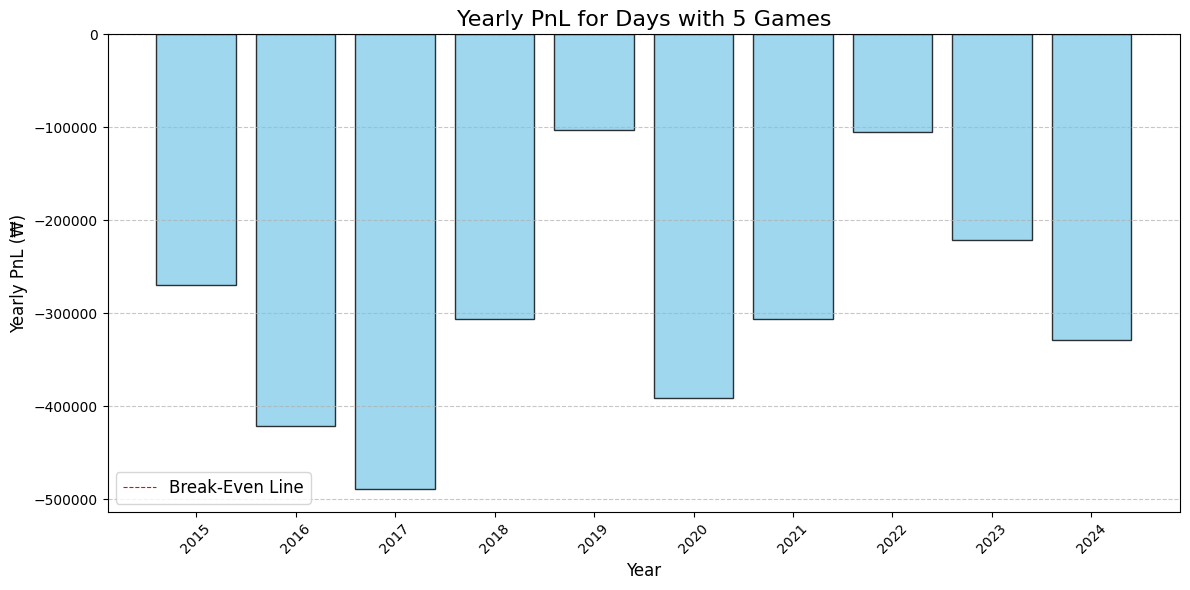

In [33]:
# 년도별로 PnL 계산
five_game_days_df['Year'] = five_game_days_df['Date'].dt.year
yearly_pnl = five_game_days_df.groupby('Year')['Total_Payout'].sum().reset_index(name='Yearly_PnL')

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(yearly_pnl['Year'], yearly_pnl['Yearly_PnL'], color='skyblue', alpha=0.8, edgecolor='black')

# 그래프 꾸미기
plt.title("Yearly PnL for Days with 5 Games", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yearly PnL (₩)", fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label="Break-Even Line")
plt.xticks(yearly_pnl['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Break-Even Line"], fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()


1. 홈/어웨이/승점 머신/딥러닝

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 데이터 로드
data = pd.read_csv("statiz_game_schedule_10_years_with_labels.csv")

# 홈/원정 팀 여부 추가
data['Home_Team'] = data['Team1']
data['Away_Team'] = data['Team2']

# 짝수 여부를 이진값으로 변환 (1: 짝수, 0: 홀수)
data['Is_Even'] = data['Odd_Even'].apply(lambda x: 1 if x == 'E' else 0)

# 입력 변수(X)와 출력 변수(y) 설정
X = data[['Home_Team', 'Away_Team', 'Score1', 'Score2']]
y = data['Is_Even']

# 범주형 변수 인코딩 (팀 이름)
X_encoded = pd.get_dummies(X, columns=['Home_Team', 'Away_Team'], drop_first=True)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 중요 변수 확인
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.head(10)  # 중요도가 높은 상위 10개 변수 출력


Confusion Matrix:
 [[569 275]
 [294 313]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       844
           1       0.53      0.52      0.52       607

    accuracy                           0.61      1451
   macro avg       0.60      0.59      0.60      1451
weighted avg       0.61      0.61      0.61      1451



,Feature,Importance
0,Score1,0.392281
1,Score2,0.386149
15,Away_Team_NC,0.012119
4,Home_Team_NC,0.011677
21,Away_Team_삼성,0.011483
3,Home_Team_LG,0.011478
10,Home_Team_삼성,0.011141
14,Away_Team_LG,0.010970
2,Home_Team_KT,0.010969
20,Away_Team_롯데,0.010954


Epoch 1/500


c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5382 - loss: 0.6903 - val_accuracy: 0.5851 - val_loss: 0.6778
Epoch 2/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.5692 - loss: 0.6808 - val_accuracy: 0.5748 - val_loss: 0.6775
Epoch 3/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.5684 - loss: 0.6793 - val_accuracy: 0.5713 - val_loss: 0.6763
Epoch 4/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.5771 - loss: 0.6737 - val_accuracy: 0.5644 - val_loss: 0.6763
Epoch 5/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.5919 - loss: 0.6667 - val_accuracy: 0.5617 - val_loss: 0.6733
Epoch 6/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5796 - loss: 0.6675 - val_accuracy: 0.5644 - val_loss: 0.6695
Epoch 7/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.5857 - loss: 0.6624 - val_accuracy: 0.5424 - val_loss: 0.6654
Epoch 8/500
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.5895 - loss: 0.6548 - val_ac

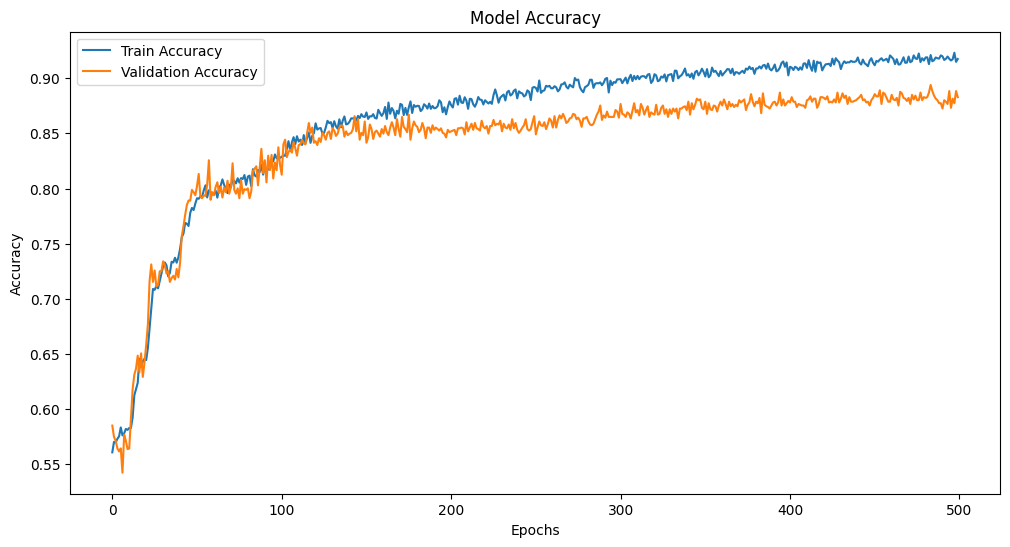

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 데이터 로드
data = pd.read_csv("statiz_game_schedule_10_years_with_labels.csv")

# 데이터 전처리
data['Home_Team'] = data['Team1']
data['Away_Team'] = data['Team2']
data['Is_Even'] = data['Odd_Even'].apply(lambda x: 1 if x == 'E' else 0)

# 입력 변수(X)와 출력 변수(y) 설정
X = data[['Home_Team', 'Away_Team', 'Score1', 'Score2']]
y = data['Is_Even']

# 범주형 변수 인코딩 및 점수 표준화
X_encoded = pd.get_dummies(X, columns=['Home_Team', 'Away_Team'], drop_first=True)
scaler = StandardScaler()
X_encoded[['Score1', 'Score2']] = scaler.fit_transform(X_encoded[['Score1', 'Score2']])

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 딥러닝 모델 설계
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# 학습 곡선 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [42]:
# 모델 저장
from tensorflow.keras.models import save_model

# 모델을 HDF5 형식으로 저장
model.save("betting_model.h5")

# 저장 완료 메시지
print("모델이 'betting_model.h5'로 저장되었습니다.")


모델이 'betting_model.h5'로 저장되었습니다.


2. 홈/어웨이/월 기준 머신/딥러닝

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 데이터 로드
data = pd.read_csv("statiz_game_schedule_10_years_with_labels.csv")

# 열 이름 확인 및 수정
data.rename(columns={"Team1": "Home_Team", "Team2": "Away_Team"}, inplace=True)

# 입력 데이터 준비
data['Month'] = pd.to_datetime(data['Date']).dt.month  # 월 정보 추가
X = data[['Home_Team', 'Away_Team', 'Month']]
y = data['Odd_Even'].apply(lambda x: 1 if x == 'E' else 0)  # 짝수 여부 변환

# 범주형 변수 인코딩
encoder = OneHotEncoder(sparse_output=False)  # sparse=False를 sparse_output=False로 변경
X_encoded = encoder.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature Importances
feature_names = encoder.get_feature_names_out(['Home_Team', 'Away_Team', 'Month'])
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 출력
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nTop 10 Feature Importances:\n", feature_importances.head(10))


Accuracy: 0.5334

Confusion Matrix:
 [[566 278]
 [399 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.63       844
           1       0.43      0.34      0.38       607

    accuracy                           0.53      1451
   macro avg       0.51      0.51      0.50      1451
weighted avg       0.52      0.53      0.52      1451


Top 10 Feature Importances:
          Feature  Importance
27       Month_6    0.043140
25       Month_4    0.041950
29       Month_8    0.041211
26       Month_5    0.039511
28       Month_7    0.037857
31      Month_10    0.034899
20  Away_Team_롯데    0.034380
15  Away_Team_NC    0.034142
30       Month_9    0.033973
13  Away_Team_KT    0.033540


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 데이터 로드
data = pd.read_csv("statiz_game_schedule_10_years_with_labels.csv")

# 열 이름 확인 및 수정 (홈팀과 원정팀 반전)
data.rename(columns={"Team1": "Away_Team", "Team2": "Home_Team"}, inplace=True)

# 승리 여부 계산
def calculate_winner(row):
    if row['Score1'] > row['Score2']:
        return row['Away_Team']
    elif row['Score1'] < row['Score2']:
        return row['Home_Team']
    else:
        return "Draw"

data['Winner'] = data.apply(calculate_winner, axis=1)
data['Home_Win'] = (data['Winner'] == data['Home_Team']).astype(int)

# 팀별 승률 계산
team_stats = data.groupby('Home_Team').agg(
    Total_Home_Games=('Home_Team', 'count'),
    Total_Home_Wins=('Home_Win', 'sum')
).reset_index()

team_stats['Home_Win_Rate'] = team_stats['Total_Home_Wins'] / team_stats['Total_Home_Games']
data = data.merge(team_stats[['Home_Team', 'Home_Win_Rate']], on='Home_Team', how='left')

# 직전 경기 결과 계산
data['Match_Key'] = data.apply(lambda x: tuple(sorted([x['Home_Team'], x['Away_Team']])), axis=1)
data = data.sort_values('Date')

previous_results = {}
last_result = []

for index, row in data.iterrows():
    match_key = row['Match_Key']
    if match_key in previous_results:
        last_result.append(previous_results[match_key])
    else:
        last_result.append(None)
    previous_results[match_key] = row['Score2'] - row['Score1']  # 홈팀 - 원정팀 점수 차이

data['Previous_Result'] = last_result

# 입력 데이터 준비
data['Month'] = pd.to_datetime(data['Date']).dt.month
X = data[['Home_Team', 'Away_Team', 'Month', 'Home_Win_Rate', 'Previous_Result']].fillna(0)
y = data['Odd_Even'].apply(lambda x: 1 if x == 'E' else 0)

# 범주형 변수 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = encoder.fit_transform(X[['Home_Team', 'Away_Team', 'Month']])
numerical_features = X[['Home_Win_Rate', 'Previous_Result']].values

# 최종 입력 데이터 구성
X_encoded = pd.DataFrame(categorical_features).join(pd.DataFrame(numerical_features))

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 개별 모델 정의
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100)
lr_clf = LogisticRegression(random_state=42, max_iter=200)
svc_clf = SVC(probability=True, random_state=42)

# 앙상블 모델 정의 (VotingClassifier)
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', rf_clf),
        ('Gradient Boosting', gb_clf),
        ('Logistic Regression', lr_clf),
        ('SVC', svc_clf)
    ],
    voting='soft'
)

# 모델 학습
ensemble_model.fit(X_train, y_train)

# 예측
y_pred = ensemble_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature Importance 계산 (Random Forest와 Gradient Boosting)
def compute_feature_importances(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        return pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
    else:
        return None

# 범주형 및 수치형 변수 이름 결합
feature_names = list(encoder.get_feature_names_out(['Home_Team', 'Away_Team', 'Month'])) + ['Home_Win_Rate', 'Previous_Result']

# Random Forest Feature Importances
rf_importances = compute_feature_importances(rf_clf, feature_names)

# Gradient Boosting Feature Importances
gb_importances = compute_feature_importances(gb_clf, feature_names)

# 출력
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

if rf_importances is not None:
    print("\nRandom Forest Feature Importances:\n", rf_importances.head(10))

if gb_importances is not None:
    print("\nGradient Boosting Feature Importances:\n", gb_importances.head(10))


ValueError: columns overlap but no suffix specified: RangeIndex(start=0, stop=2, step=1)